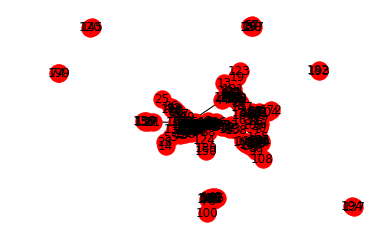

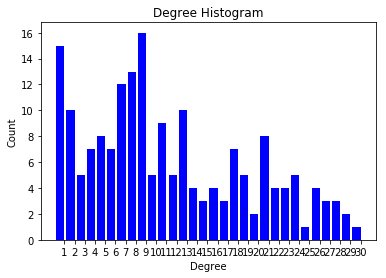

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import signal as sg
import networkx as nx
from networkx import community
import collections


pathname = '/Users/carlosfloyd/Dropbox/dirs/dirBS2/Output/'
cmgraph = open(pathname + 'CMGraph.traj','r')
cmgraph_lines = cmgraph.readlines()
num_time_points = int(len(cmgraph_lines)/3)
dict_of_edge_lines = {}
i=1

for j in range(num_time_points):

    time_point = cmgraph_lines[i-1].split()[1]
    line = cmgraph_lines[i].split()
    num_edges = int(len(line)/3)
    edge_list_line = []

    for k in range(num_edges):
        node_1 = str(line[3*k])
        node_2 = str(line[3*k+1])
        weight = str(line[3*k+2])
        entry = node_1 + " " + node_2 + " {'weight':" + weight + "}"
        edge_list_line.append(entry)
        

    dict_of_edge_lines[str(j)] = edge_list_line   
    i = i+3



time_point = '1000'
G = nx.parse_edgelist(dict_of_edge_lines[time_point])

num_filaments = len(G)


plt.figure()

pos=nx.spring_layout(G)
nx.draw_networkx(G,pos)

all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #4 b. Get unique weights
unique_weights = list(set(all_weights))
 
    #4 c. Plot the edges - one by one!
for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    width = weight*num_filaments*3.0/sum(all_weights)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
 
    #Plot the graph
plt.axis('off')


degree_sequence = sorted([d for n, d in G.degree(weight=True)], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()


({'72'}, {'157'}, {'28'}, {'55'}, {'58'}, {'117'}, {'59'}, {'115'}, {'122'}, {'178'}, {'29'}, {'173'}, {'160'}, {'186'}, {'6'}, {'183'}, {'65'}, {'80'}, {'179'}, {'2'}, {'147'}, {'185'}, {'49'}, {'196'}, {'20'}, {'152'}, {'164'}, {'57'}, {'197'}, {'133'}, {'93'}, {'110'}, {'10'}, {'119'}, {'86'}, {'94'}, {'184'}, {'23'}, {'170'}, {'125'}, {'158'}, {'76'}, {'166'}, {'39'}, {'26'}, {'64'}, {'69'}, {'54'}, {'118'}, {'168'}, {'89'}, {'121'}, {'169'}, {'113'}, {'176'}, {'74'}, {'199'}, {'90'}, {'146'}, {'180'}, {'51'}, {'87'}, {'41'}, {'85'}, {'27'}, {'83'}, {'70'}, {'171'}, {'60'}, {'101'}, {'52'}, {'129'}, {'120'}, {'145'}, {'77'}, {'5'}, {'36'}, {'1'}, {'159', '31', '136', '139'}, {'116'}, {'45', '155'}, {'24', '84', '187', '98'}, {'32', '16', '107', '153'}, {'127'}, {'33'}, {'97'}, {'142'}, {'38'}, {'106'}, {'35'}, {'11', '156'}, {'63'}, {'167'}, {'182', '193'}, {'37'}, {'75'}, {'105'}, {'91', '81', '112', '162', '95'}, {'132', '149', '181', '30', '48'}, {'53'}, {'140'}, {'15'}, {'191'}

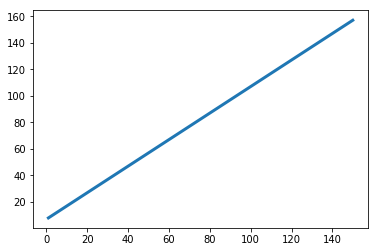

In [19]:

communities_generator = community.girvan_newman(G)
up = 150
nums = np.linspace(1,up,up)
dat = np.zeros(len(nums))
for i in nums:
    
    tlc = next(communities_generator)
    dat[int(i-1)] = len(tlc)


plt.figure()
plt.plot(nums,dat,linewidth=3.0)
print(tlc)



In [54]:
communities_generator = community.girvan_newman(G)
up = 10
for i in range(up):
    tlc = next(communities_generator)
    
print(tlc)


({'83', '127', '65', '58', '117', '172', '157', '72', '76', '89', '125', '104', '163', '73', '166'}, {'28', '131', '55', '14', '42'}, {'156', '23', '169', '56', '115', '185', '36', '47', '121', '99', '59', '40', '5', '108', '105', '170', '11', '165', '17', '195', '46'}, {'114', '192', '53', '2', '71', '190', '51', '52', '54', '64', '15', '151', '27', '12', '26', '102', '94', '50', '80', '4', '164', '35', '129', '184', '122', '69', '62', '107', '90', '130', '118', '119', '176', '168', '16', '109', '152', '33', '154', '32', '6', '66', '38', '178', '78', '67', '79', '143', '37', '111', '183', '43', '140', '113', '8', '10', '134', '75', '82', '179', '153'}, {'29', '68', '138', '22', '133', '146'}, {'116', '101', '88', '63', '196', '77', '173', '128', '106', '3', '180', '60', '155', '167', '49', '45'}, {'96', '20', '44', '91', '175', '13', '147', '87', '81', '112', '198', '162', '97', '186', '191', '39', '160', '95', '103', '142'}, {'18', '197', '57', '158'}, {'98', '84', '187', '24', '86',

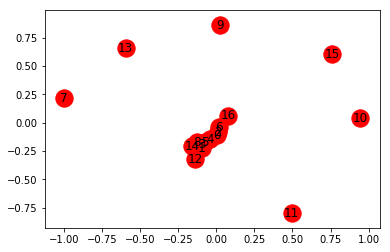

In [59]:
GCG = nx.Graph()
for i in range(len(tlc)):
    GCG.add_node(i,size=len(tlc[i]))

    
for ci in range(len(tlc)):
    for cj in range(ci):
        ew = 0
        for ni in tlc[ci]:
            for nj in tlc[cj]:
                s = G.get_edge_data(ni,nj)
                if s:   
                    ew = ew + G.get_edge_data(ni,nj)['weight']
        if ew != 0:
            GCG.add_edge(ci,cj,weight = ew)
        
plt.figure()

pos=nx.spring_layout(GCG)
nx.draw_networkx(GCG,pos)
            

{0: 15, 1: 5, 2: 21, 3: 61, 4: 6, 5: 16, 6: 20, 7: 4, 8: 8, 9: 2, 10: 11, 11: 2, 12: 5, 13: 2, 14: 3, 15: 2, 16: 2}
[15, 5, 21, 61, 6, 16, 20, 4, 8, 2, 11, 2, 5, 2, 3, 2, 2]


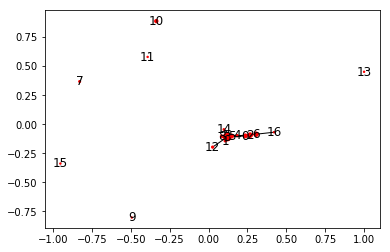

In [70]:
pos=nx.spring_layout(GCG)

size_list = color=nx.get_node_attributes(GCG,'size')

print(size_list)
sl = []
for key in size_list:
    sl.append(size_list[key])
print(sl)
nx.draw_networkx(GCG,pos,node_size = sl)